<a href="https://colab.research.google.com/github/Switch-bot/TFPA-II/blob/main/Template_RooFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://root.cern/download/root_v6.28.00.Linux-ubuntu20-x86_64-gcc9.4.tar.gz

--2023-02-23 16:08:44--  https://root.cern/download/root_v6.28.00.Linux-ubuntu20-x86_64-gcc9.4.tar.gz
Resolving root.cern (root.cern)... 188.184.49.144, 2001:1458:d00:55::100:c
Connecting to root.cern (root.cern)|188.184.49.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255191996 (243M) [application/x-gzip]
Saving to: ‘root_v6.28.00.Linux-ubuntu20-x86_64-gcc9.4.tar.gz’

root_v6.28.00.Linux 100%[===================>] 243.37M  23.1MB/s    in 12s     

2023-02-23 16:08:57 (19.9 MB/s) - ‘root_v6.28.00.Linux-ubuntu20-x86_64-gcc9.4.tar.gz’ saved [255191996/255191996]



In [ ]:
! tar xfvz root_v6.28.00.Linux-ubuntu20-x86_64-gcc9.4.tar.gz

Streaming output truncated to the last 5000 lines.
root/include/TSelectorList.h
root/include/TGLPlotCamera.h
root/include/RooHelpers.h
root/include/TNodeDiv.h
root/include/RooCmdArg.h
root/include/RooUniformBinning.h
root/include/RooRealConstant.h
root/include/TVirtualCollectionIterators.h
root/include/RooMath.h
root/include/RooTMathReg.h
root/include/TEveLineEditor.h
root/include/TEveChunkManager.h
root/include/TVirtualAuth.h
root/include/TSQLRow.h
root/include/THtml.h
root/include/TBufferText.h
root/include/TList.h
root/include/TVirtualX.h
root/include/TGeoPhysicalNode.h
root/include/RooRealAnalytic.h
root/include/RooNumIntConfig.h
root/include/THbookTree.h
root/include/TEnv.h
root/include/RooCBShape.h
root/include/TMatrixDBase.h
root/include/XrdPfc/
root/include/XrdPfc/XrdPfcDecision.hh
root/include/TSessionLogView.h
root/include/TGondzioSolver.h
root/include/TSelector.h
root/include/TPacketizerFile.h
root/include/TVector.h
root/include/RooCrystalBall.h
root/include/TDavixFile.h
roo

In [ ]:
#Getting all the dependencies needed to run ROOT in colabs
#In case the notebook crashes, only need to rerun this block
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion
import sys
sys.path.append("root/bin/")
sys.path.append("root/include/")
sys.path.append("root/lib/")
import ctypes
ctypes.cdll.LoadLibrary('root/lib/libCore.so')
#ctypes.cdll.LoadLibrary('root/libThread.so')
ctypes.cdll.LoadLibrary('root/lib/libTreePlayer.so')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:9.3.0-1ubuntu2).
g++ set to manually installed.
gcc is already the newest version (4:9.3.0-1ubuntu2).
gcc set to manually installed.
gfortran is already the newest version (4:9.3.0-1ubuntu2).
libxext-dev is already the newest version (2:1.3.4-0ubuntu1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.3-0ubuntu1).
binutils is already the newest version (2.34-6ubuntu1.4).
binutils set to manually installed.
cmake is already the newest version (3.16.3-1ubuntu1.20.04.1).
dpkg-dev is already the newest version (1.19.7ubuntu3.2).
dpkg-dev set to manually installed.
git is already the newest version (1:2.25.1-1ubuntu3.10).
libx11-dev is already the newest version (2:1.6.9-2ubuntu1.2).
libx11-dev set to manually installed.
tar is already the newest version (1.30+dfsg-7ubuntu0.20.04.2).
The following package was automatically i

<CDLL 'root/lib/libTreePlayer.so', handle 29bb700 at 0x7fefa66f9a60>

In [ ]:
!source root/bin/thisroot.sh

Welcome to JupyROOT 6.28/00


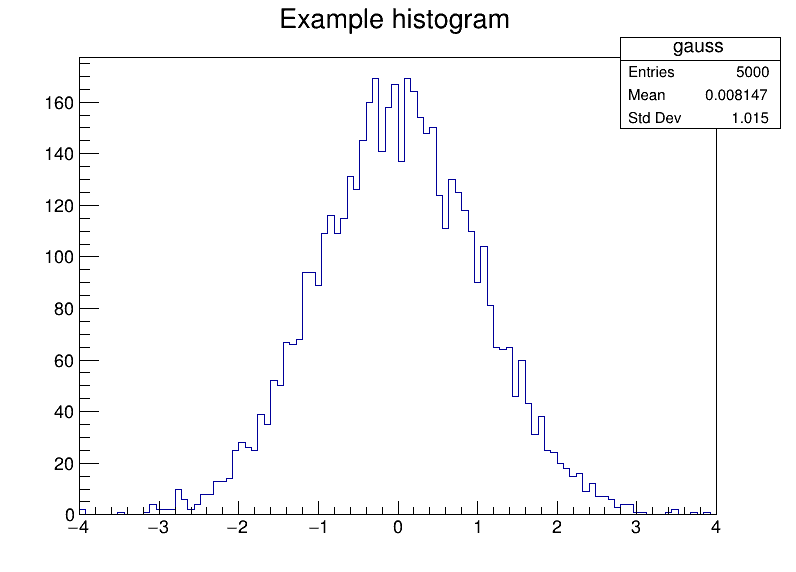

In [ ]:
#Checking whether ROOT is functioning properly (do this everytime to also import ROOT)
import ROOT
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
h.FillRandom("gaus")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
h.Draw()
c.Draw()

In [ ]:
#Mounting google drive on the local repository seems to be the easiest way to import files into google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Block to import all the ROOT functions that we will be using throughout this template
from ROOT import TFile
from ROOT import TLorentzVector
from ROOT import TH1F
import numpy as np
from ROOT import RooRealVar
from ROOT import RooDataHist
from ROOT import RooDataSet
from ROOT import RooExponential
from ROOT import RooGaussian
from ROOT import RooArgList
from ROOT import RooArgSet
from ROOT import RooAddPdf
from ROOT import RooPlot
from ROOT import TLegend
from ROOT import RooFit
from ROOT import TLatex
from ROOT import RooChi2Var

In [ ]:
#Simple command to check the contents on the .root file

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#
#Always remember to check if the path is correct, and whether the drive has been mounted or not
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#
f1 = TFile("/content/gdrive/My Drive/Colab Notebooks/TFPAII/Skim4.root")
f1.ls()

#oniaTree is the TTree in the Skim4.root file, as shown by the previous command
f1.oniaTree.Print()

TFile**		/content/gdrive/My Drive/Colab Notebooks/TFPAII/Skim4.root	
 TFile*		/content/gdrive/My Drive/Colab Notebooks/TFPAII/Skim4.root	
  KEY: TTree	oniaTree;5	Tree of Onia2MuMu [current cycle]
  KEY: TTree	oniaTree;4	Tree of Onia2MuMu [backup cycle]
******************************************************************************
*Tree    :oniaTree  : Tree of Onia2MuMu                                      *
*Entries :   998881 : Total =       207772855 bytes  File  Size =  106138775 *
*        :          : Tree compression factor =   1.96                       *
******************************************************************************
*Br    0 :event     : event/I                                                *
*Entries :   998881 : Total  Size=    3996389 bytes  File Size  =    3509564 *
*Baskets :        5 : Basket Size=   11619095 bytes  Compression=   1.14     *
*............................................................................*
*Br    1 :dimuon_p4 : TLorentzVector

In [ ]:
#Establishing the canvas so we can draw the plots
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


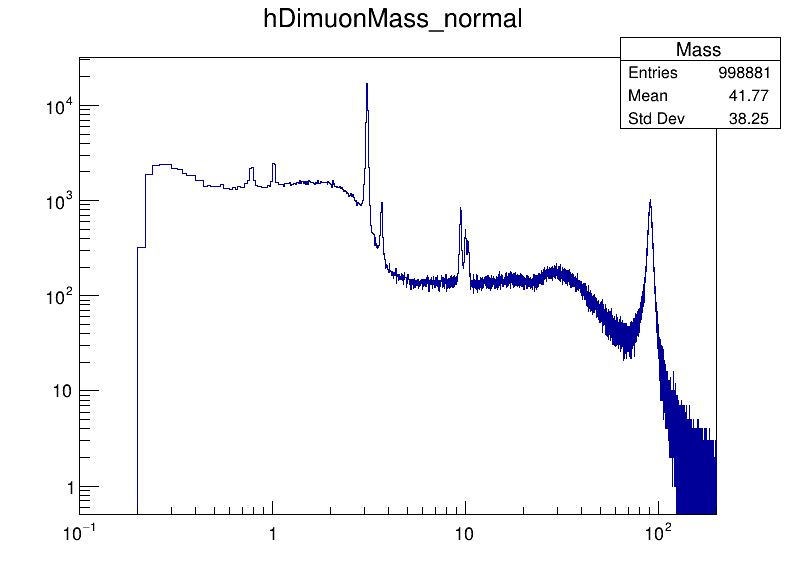

In [ ]:
# Plotting a simple histogram with the Dimuons' mass

hist1 = TH1F("Mass","hDimuonMass_normal",10000, 0.1, 200)

#Iterating over events in order to fill the histogram with the dimuon invariant mass
maxEvents = f1.oniaTree.GetEntries()

for index, event in enumerate(f1.oniaTree):
  hist1.Fill(event.dimuon_p4.M())
  if index > maxEvents:break

#Drawing the histogram, in the previously created canvas, with logarithmic axes
hist1.Draw()
c.SetLogy(True)
c.SetLogx(True)
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: Mass (Potential memory leak).


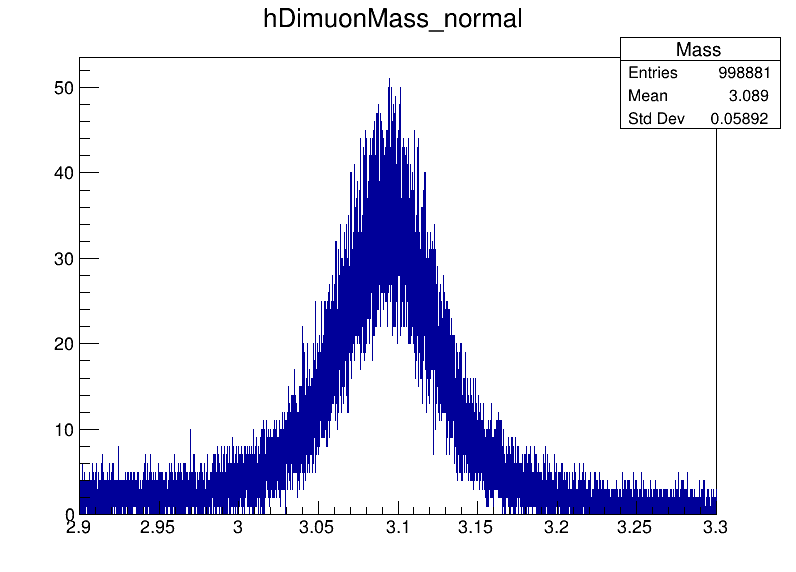

In [ ]:
# Plotting a simple histogram with the Dimuons' mass

hist3 = TH1F("Mass","hDimuonMass_normal",10000, 2.9, 3.3)

#Iterating over events in order to fill the histogram with the dimuon invariant mass
maxEvents = f1.oniaTree.GetEntries()

for index, event in enumerate(f1.oniaTree):
  NewTlorentz = event.muonN_p4 + event.muonP_p4
  hist3.Fill(NewTlorentz.M())
  if index > maxEvents:break

#Drawing the histogram, in the previously created canvas, with logarithmic axes
hist3.Draw()
c.SetLogy(False)
c.SetLogx(False)
c.Draw()

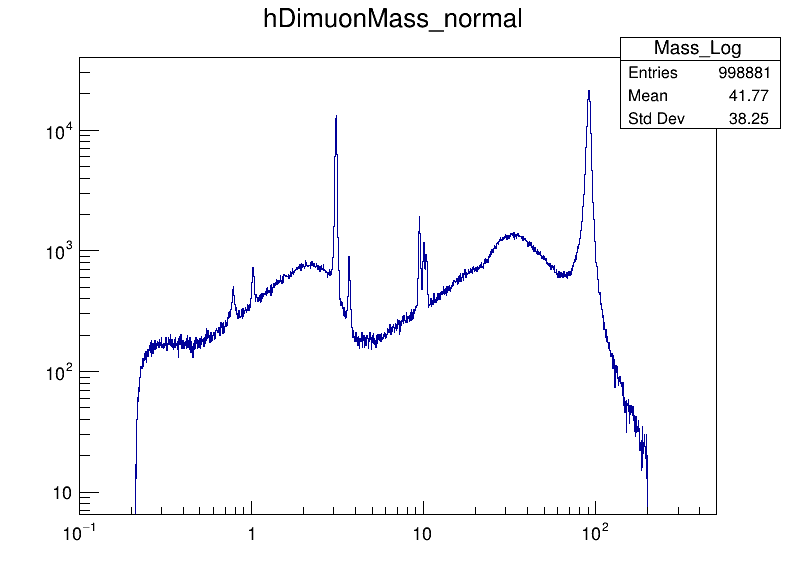

In [ ]:
# Plotting the Dimuon's mass in an histogram with variable bin widths

#Creating an array with values corresponding to each bin's width
maxbins = 100000
xbins = [0]*maxbins
xbins[0] = 0.1
nbins = 0
binproportion = 0.005
i = 1
while xbins[nbins]<500:
  xbins[i] = xbins[i-1]*(1+binproportion)
  nbins += 1
  i += 1
  if nbins >= maxbins: break 
#xbins needs to be converted into an array (we have been using lists) because
# TH1F takes an array as input
xbinsarray = np.array(xbins)


hist2 = TH1F("Mass_Log","hDimuonMass_normal", nbins, xbinsarray)

#Iterating over all events to fill the histogram
maxEvents = f1.oniaTree.GetEntries()

for index, event in enumerate(f1.oniaTree):
  hist2.Fill(event.dimuon_p4.M())
  if index > maxEvents:break

#Drawing the histogram
hist2.Draw()
c.SetLogy(True)
c.SetLogx(True)
c.Draw()

[#0] WARNING:InputArguments -- The parameter 'sigma' with range [0, 0.2] of the RooGaussian 'signal' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#0] ERROR:Integration --  RooNumIntFactory::Init : libRooFitMore cannot be loaded. GSL integrators will not beavailable ! 
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (signal,background)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 lambda      -3.00000e-01  1.50000e-01   -4.00000e+00  0.00000e+00
     2 mean         3.10000e+00  4.00000e-02    2.90000e+00  3.30000e+00
     3 n_back       1.62568e+04  8.12840e+03    0.00000e+00  8.12

Warning in <TFile::Append>: Replacing existing TH1: Mass (Potential memory leak).
cling::DynamicLibraryManager::loadLibrary(): libgsl.so.23: cannot open shared object file: No such file or directory


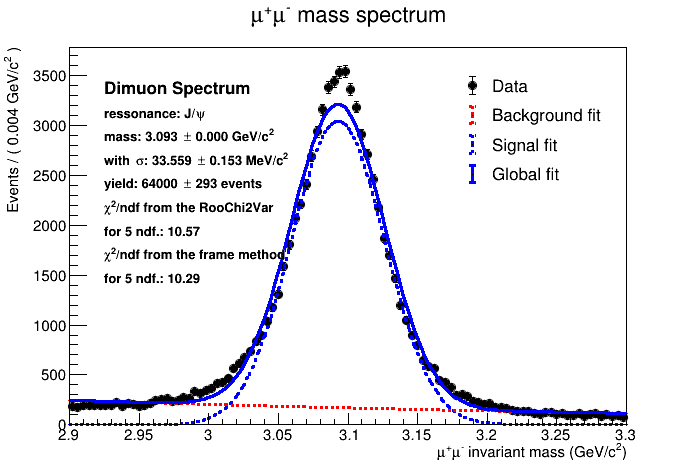

In [ ]:
# Fitting the J/Psi peak

#Setting the mass limits of the peak
mmin = 2.9
mmax = 3.3

hist3 = TH1F("Mass","hDimuonMass_peak",100, mmin, mmax)

#Filling the histogram with the relevant data
maxEvents = f1.oniaTree.GetEntries()

for index, event in enumerate(f1.oniaTree):
  hist3.Fill(event.dimuon_p4.M())
  if index > maxEvents: break

#Create a Mass variable that RooFit can use, and importing the relevant dataset
mass = RooRealVar("mass", "#mu^{+}#mu^{-} invariant mass", mmin, mmax, "GeV/c^{2}")
args = RooArgList(mass)
dh = RooDataHist("dh", "dh", args, hist3)

#Define background model (exponential) and its parameters
Lambda = RooRealVar("lambda", "lambda", -0.3, -4.0, 0.0)
background = RooExponential("background", "background", mass, Lambda)

#Define signal model (Gaussian) and its parameters
mean = RooRealVar("mean", "mean", 0.5*(mmin+mmax), mmin, mmax)
sigma = RooRealVar("sigma", "sigma", 0.1*(mmax-mmin),0.,0.5*(mmax-mmin))
signal = RooGaussian("signal", "signal", mass, mean, sigma)

#Define variables for number of signal and background events
n_signal_initial = 0.8*dh.sumEntries()
n_back_initial = 0.2*dh.sumEntries()
n_signal = RooRealVar("n_signal","n_signal",n_signal_initial,0.,dh.sumEntries())
n_back = RooRealVar("n_back","n_back",n_back_initial,0.,dh.sumEntries())

#Sum signal and background models
model = RooAddPdf("model", "model", RooArgList(signal, background), RooArgList(n_signal, n_back))

#Perform the fit
model.fitTo(dh)

#Plot the fit
frame = mass.frame()
frame.SetTitle("#mu^{+}#mu^{-} mass spectrum")

dh.plotOn(frame,RooFit.Name("dh"))
model.plotOn(frame,RooFit.Name("modelSig"),RooFit.Components("signal"),RooFit.LineStyle(ROOT.kDashed))
model.plotOn(frame,RooFit.Name("modelBkg"),RooFit.Components("background"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kRed))
model.plotOn(frame,RooFit.Name("model"))

roofit_canvas = ROOT.TCanvas()
frame.Draw()

#Draw a caption
legend = TLegend(0.65,0.6,0.88,0.85)
legend.SetBorderSize(0)
legend.SetTextFont(40)
legend.SetTextSize(0.04)
legend.AddEntry(frame.findObject("dh"),"Data","1pe")
legend.AddEntry(frame.findObject("modelBkg"),"Background fit","1pe")
legend.AddEntry(frame.findObject("modelSig"),"Signal fit","1pe")
legend.AddEntry(frame.findObject("model"),"Global fit","1pe")
legend.Draw()

#Display info and fit results
L = TLatex()
L.SetNDC()
L.SetTextSize(0.04)
L.DrawLatex(0.15,0.8,"Dimuon Spectrum")
L.SetTextSize(0.03)
L.DrawLatex(0.15,0.75,"ressonance: J/#psi")
L.DrawLatex(0.15,0.70,ROOT.Form("mass: %5.3f #pm %5.3f GeV/c^{2}" % (mean.getVal(),mean.getError())))
L.DrawLatex(0.15,0.65,ROOT.Form("with #sigma: %5.3f #pm %5.3f MeV/c^{2}" % (sigma.getVal()*1000,sigma.getError()*1000)))
L.DrawLatex(0.15,0.60,ROOT.Form("yield: %.0f #pm %.0f events" % (n_signal.getVal(),n_signal.getError())))
chi = RooChi2Var("chi","chi^2",model,dh)
variables = 5 # This is the number of free parameters in our model, and the
              # number of degrees of freedom is the the number of points in our
              # model minus the free parameters
L.DrawLatex(0.15,0.55,ROOT.Form("#chi^{2}/ndf from the RooChi2Var"))
L.DrawLatex(0.15,0.50,ROOT.Form("for %i ndf.: %.2f" % (variables,(chi.getVal()/(100.-variables)))))
L.DrawLatex(0.15,0.45,ROOT.Form("#chi^{2}/ndf from the frame method"))
L.DrawLatex(0.15,0.40,ROOT.Form("for %i ndf.: %.2f" %  (variables,frame.chiSquare(variables))))

roofit_canvas.Draw()

  1) 0x115351b0 RooRealVar:: mass = 3.05942  L(2.9 - 3.3) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x115351b0 RooRealVar:: mass = 3.06918  L(2.9 - 3.3) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x115351b0 RooRealVar:: mass = 3.01742  L(2.9 - 3.3) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x115351b0 RooRealVar:: mass = 3.04232  L(2.9 - 3.3) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x115351b0 RooRealVar:: mass = 3.26536  L(2.9 - 3.3) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x115351b0 RooRealVar:: mass = 3.14628  L(2.9 - 3.3) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x115351b0 RooRealVar:: mass = 3.25973  L(2.9 - 3.3) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x115351b0 RooRealVar:: mass = 3.11157  L(2.9 - 3.3) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
  1) 0x115351b0 RooRealVar:: mass = 3.10789  L(2.9 - 3.3) // [GeV/c^{2}] "#mu^{+}#mu^{-} invariant mass"
[#0] WARNING:InputArguments -- The parameter 'sigma' wi

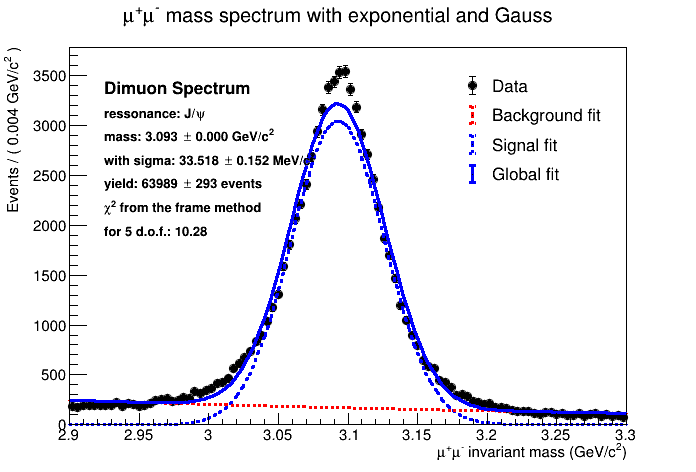

In [ ]:
#Making an unbinned Fit
#The main difference is that instead of feeding the model a RooDataHist
#we feed it a RooDataSet object

#Setting the mass limits of the peak
mmin = 2.9
mmax = 3.3

#Performing the mass cut a priori
#There are several ways of initiating a RooDataSet object
#One of them is by directly importing a TTree object
#If we do so, then we must define every variable in the TTree as a RooRealVar
#And we can perform the cuts directly on the RooDataSet when initiating it
#or afterwards with RooCut objects 
masslist = []
for entry in f1.oniaTree:
  if mmin <= entry.dimuon_p4.M() <= mmax:
    masslist.append(entry.dimuon_p4.M())

#Create a Mass variable that RooFit can use, and importing the relevant dataset
mass = RooRealVar("mass", "#mu^{+}#mu^{-} invariant mass", mmin, mmax, "GeV/c^{2}")
ds = RooDataSet("ds","ds",RooArgSet(mass))

#We will set the entries one by one on the RooDataSet. This can be generalized
#for n dimensions with setValue() for each variable
#followed by ds.add(RooArgSet(mass, var0, var1, ..., varn))
for value in masslist:
  mass.setVal(value)
  ds.add(RooArgSet(mass))

#Simple way of checking the RooDataSet entries if you want to make sure that
#the RooDataSet has been correctly filled
for n in range(9):
  ds.get(n).Print("v")

#Define background model (exponential) and its parameters I chose this because everythign in particle physics are exponentials
Lambda = RooRealVar("lambda", "lambda", -0.3, -4.0, 0.0)
background = RooExponential("background", "background", mass, Lambda)

#Define signal model (Gaussian) and its parameters
mean = RooRealVar("mean", "mean", 0.5*(mmin+mmax), mmin, mmax)
sigma = RooRealVar("sigma", "sigma", 0.1*(mmax-mmin),0.,0.5*(mmax-mmin))
signal = RooGaussian("signal", "signal", mass, mean, sigma)

#Define variables for number of signal and background events
n_signal_initial = 0.8*ds.sumEntries()
n_back_initial = 0.2*ds.sumEntries()
n_signal = RooRealVar("n_signal","n_signal",n_signal_initial,0.,ds.sumEntries())
n_back = RooRealVar("n_back","n_back",n_back_initial,0.,ds.sumEntries())

#Sum signal and background models
model = RooAddPdf("model", "model", RooArgList(signal, background), RooArgList(n_signal, n_back))

#Perform the fit
model.fitTo(ds)

#Plot the fit
frame = mass.frame()
frame.SetTitle("#mu^{+}#mu^{-} mass spectrum with exponential and Gauss")

ds.plotOn(frame,RooFit.Name("ds"))
model.plotOn(frame,RooFit.Name("modelSig"),RooFit.Components("signal"),RooFit.LineStyle(ROOT.kDashed))
model.plotOn(frame,RooFit.Name("modelBkg"),RooFit.Components("background"),RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kRed))
model.plotOn(frame,RooFit.Name("model"))

roofit_canvas = ROOT.TCanvas()
frame.Draw()

#Draw a caption
legend = TLegend(0.65,0.6,0.88,0.85)
legend.SetBorderSize(0)
legend.SetTextFont(40)
legend.SetTextSize(0.04)
legend.AddEntry(frame.findObject("ds"),"Data","1pe")
legend.AddEntry(frame.findObject("modelBkg"),"Background fit","1pe")
legend.AddEntry(frame.findObject("modelSig"),"Signal fit","1pe")
legend.AddEntry(frame.findObject("model"),"Global fit","1pe")
legend.Draw()

#Display info and fit results
L = TLatex()
L.SetNDC()
L.SetTextSize(0.04)
L.DrawLatex(0.15,0.8,"Dimuon Spectrum")
L.SetTextSize(0.03)
L.DrawLatex(0.15,0.75,"ressonance: J/#psi")
L.DrawLatex(0.15,0.70,ROOT.Form("mass: %5.3f #pm %5.3f GeV/c^{2}" % (mean.getVal(),mean.getError())))
L.DrawLatex(0.15,0.65,ROOT.Form("with sigma: %5.3f #pm %5.3f MeV/c^{2}" % (sigma.getVal()*1000,sigma.getError()*1000)))
L.DrawLatex(0.15,0.60,ROOT.Form("yield: %.0f #pm %.0f events" % (n_signal.getVal(),n_signal.getError())))
free_parameters = 5
L.DrawLatex(0.15,0.55,ROOT.Form("#chi^{2} from the frame method"))
L.DrawLatex(0.15,0.50,ROOT.Form("for 5 d.o.f.: %.2f" % frame.chiSquare(free_parameters)))

roofit_canvas.Draw()
